In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/repo_tesis/entorno_tesis_Molina"
!source bin/activate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/repo_tesis/entorno_tesis_Molina


In [2]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import os
import pickle
import sys
import sklearn.metrics
import seaborn as sns
# Añadir la ruta al sys.path. Lo dejo comentado porque está en el mismo directorio
sys.path.append("/content/drive/My Drive/tesis_Molina/estructura_codigos/experimentos_mlp_arboles")

# Importar las funciones necesarias
from gs_functions import mean_inference_time_func, std_inference_time_func, max_inference_time_func, min_inference_time_func


In [3]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


# Grid Search

## Separación de datos por sujeto

In [3]:
ruta_experimento = "/content/drive/My Drive/tesis_Molina/estructura_codigos/experimentos_mlp_arboles/resultados/resultados_gs"
os.chdir(ruta_experimento) # me situo en el directorio

pipelines_CV = joblib.load('gs_dt_PredefinedSplit.pkl')
particiones_CV = joblib.load('ps_dt_PredefinedSplit.pkl')

## Separación de datos por repetición

In [ ]:
# Levanto los datos de los resultados del Grid Search
%cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS"

pipelines_CV = joblib.load('gs_dt_PredefinedSplit_sep_rep.pkl')
particiones_CV = joblib.load('ps_dt_PredefinedSplit_sep_rep.pkl')

/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS


In [ ]:
gs = pipelines_CV[0]
print(gs)

GridSearchCV(cv=PredefinedSplit(test_fold=array([0, 0, ..., 8, 8])),
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [5, 10, 15, 20, None]},
             refit=False, return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro)})


In [ ]:
gs = pipelines_CV[0]
print(gs)

GridSearchCV(cv=PredefinedSplit(test_fold=array([0, 0, ..., 8, 8])),
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [5, 10, 15, 20, None]},
             refit=False, return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'max_inference_time': <function max_inference_time_func at 0x7ecfe87c9750>,
                      'mean_inference_time': <function mean_inference_time_func at 0x7ecfe87c9630>,
                      'min_inference_time': <function min_inference_time_func at 0x7ecfe87c97e0>,
                      'precision': make_scorer(precision_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro),
                      'std_inference_time': <function std_inference_time_func at 0x7ecfe87c96c0>})


In [4]:
# elijo el numero de experimento. Tengo 10 experimentos, uno por sujeto o fold
i = 0

# elijo el directorio donde quiero guardar los resultados del experimento actual
ruta_imag = "/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sub/sub" + str(i+1) + "_test"
os.makedirs(ruta_imag, exist_ok=True) # me fijo si existe, si no, lo creo
os.chdir(ruta_imag) # me situo en el directorio

# miro los resultados del Grid Search para el sujeto elegido
grid_search = pipelines_CV[i]
# obtengo los resultados de Grid Search
cv_results = grid_search.cv_results_
# creo un DataFrame con los resultados
df_results = pd.DataFrame(cv_results)

# obtengo la lista de nombres de las columnas
column_names = df_results.columns.tolist()

print(column_names)
# df_results["params"]
# a= cv_results['mean_score_time']
# a

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model__max_depth', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'split2_train_accuracy', 'split3_train_accuracy', 'split4_train_accuracy', 'split5_train_accuracy', 'split6_train_accuracy', 'split7_train_accuracy', 'split8_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'split5_test_precision', 'split6_test_precision', 'split7_test_precision', 'split8_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_train_precision', 'split1_train_precision

### Estructuro, visualizo y guardo los datos de interés
Objetivos:

*   Visualización.
*   Guardar métricas en Comet de forma más amigable.

Genero un diccionario en el que discrimino por valor de hiperparámetro y elijo guardar determinadas columnas.

También elijo qué métrica quiero visualizar.



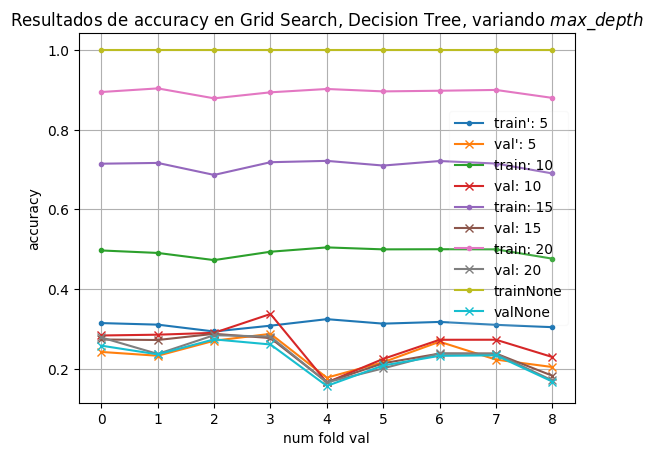

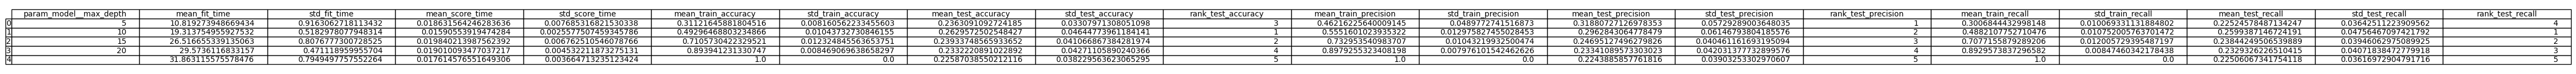

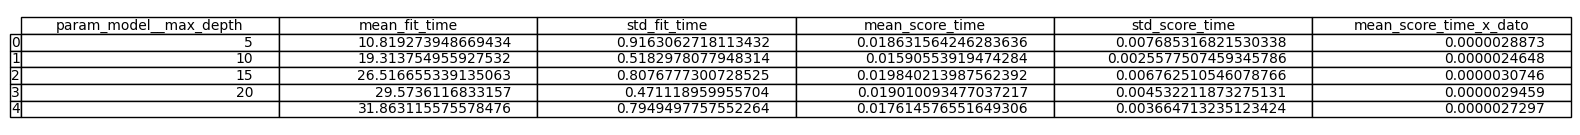

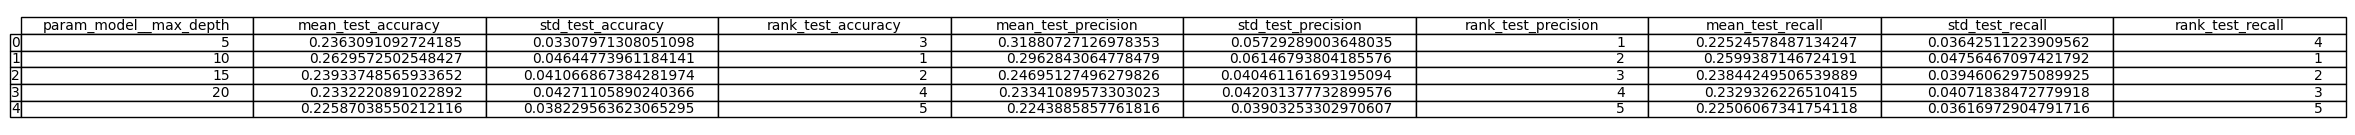

In [5]:
# defino la metrica a visualizar
metric_name = 'accuracy'  # accuracy, precision o recall funciona bien

# para metricas me sirve esta definicion
columns_names = ['split0_test_'+metric_name, 'split1_test_'+metric_name, 'split2_test_'+metric_name,
                 'split3_test_'+metric_name, 'split4_test_'+metric_name, 'split5_test_'+metric_name,
                 'split6_test_'+metric_name, 'split7_test_'+metric_name, 'split8_test_'+metric_name,
                 'mean_test_'+metric_name, 'std_test_'+metric_name,
                 'split0_train_'+metric_name, 'split1_train_'+metric_name, 'split2_train_'+metric_name,
                 'split3_train_'+metric_name, 'split4_train_'+metric_name, 'split5_train_'+metric_name,
                 'split6_train_'+metric_name, 'split7_train_'+metric_name, 'split8_train_'+metric_name]

# esto es para metricas
# lo saco de df_results["params"]
param_comb = [{'model__max_depth': 5}, {'model__max_depth': 10}, {'model__max_depth': 15}, {'model__max_depth': 20}, {'model__max_depth': None}]

def extract_grid_search_results(cv_results, column_names, param_comb):
    """
    Extrae resultados específicos de cv_results de GridSearchCV.

    Args:
    cv_results (dict): Diccionario de resultados de GridSearchCV.
    column_names (list): Lista de nombres de columnas que se desean extraer de cv_results.
    param_comb (list): Lista de combinaciones de hiperparámetros a incluir en los resultados.

    Returns:
    dict: Diccionario con los resultados extraídos.
    """
    resultados = {}

    # Filtrar combinaciones de hiperparámetros
    for i in range(len(cv_results['params'])):
        current_params = cv_results['params'][i]
        if current_params in param_comb:
            metrics = {}
            for column in column_names:
                metrics[column] = cv_results[column][i]
            resultados[str(current_params)] = metrics

    return resultados

resultados = extract_grid_search_results(grid_search.cv_results_, columns_names, param_comb)
pd.DataFrame(resultados)

# ------- AGREGO TODO EL CÓDIGO PARA EJECUTAR MÁS RÁPIDO--------------------------
# Tomo una estructura de datos del bloque anterior (estructuración de datos) y los visualizo
# está hecho para visualizar una metrica por fold
data = resultados.copy()

# esto me sirve para graficar métricas
# Voy a hacer el gráfico por folds
columns_to_visualize = ['split0_test_'+metric_name, 'split1_test_'+metric_name, 'split2_test_'+metric_name,
                 'split3_test_'+metric_name, 'split4_test_'+metric_name, 'split5_test_'+metric_name,
                 'split6_test_'+metric_name, 'split7_test_'+metric_name, 'split8_test_'+metric_name,
                 'split0_train_'+metric_name, 'split1_train_'+metric_name, 'split2_train_'+metric_name,
                 'split3_train_'+metric_name, 'split4_train_'+metric_name, 'split5_train_'+metric_name,
                 'split6_train_'+metric_name, 'split7_train_'+metric_name, 'split8_train_'+metric_name]
vectores_grafica = []
labels = []
for outer_key, inner_dict in data.items():
  labels.append(outer_key)
  test_values = []
  train_values = []
  for inner_key, inner_value in inner_dict.items():
    if (('test' in inner_key) and (inner_key in columns_to_visualize)):
      test_values.append(inner_value)
    elif (('train' in inner_key) and (inner_key in columns_to_visualize)):
      train_values.append(inner_value)
  vectores_grafica.append([train_values, test_values])

plt.figure()
for i in range(len(vectores_grafica)):
  plt.plot(vectores_grafica[i][0], '.-', label = 'train'+labels[i][-5:-1])  # la 0 es la de train
  plt.plot(vectores_grafica[i][1], '-x', label = 'val'+labels[i][-5:-1])  # la 1 es la de val
plt.xlabel("num fold val")
plt.ylabel(metric_name)
plt.legend(fancybox=True, framealpha=0.1)
plt.title("Resultados de " + metric_name + " en Grid Search, Decision Tree, variando $max\_depth$")
plt.grid()
plt.savefig(metric_name + '.png')

joblib.dump(vectores_grafica, metric_name + '.pkl')

# para atributos que no son métricas
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'mean_train_accuracy', 'std_train_accuracy',
    'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_train_precision', 'std_train_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_train_recall', 'std_train_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]

attributes_to_save = df_results.loc[:, columns_names]


# En el caso que el resultado sea un df, lo guardo como imagen
joblib.dump(attributes_to_save, "atributos_GridSearch.pkl")

# Guardo todos los atributos
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(60, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_GridSearch.png', bbox_inches='tight')

# Atributos de tiempo
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]

attributes_to_save = df_results.loc[:, columns_names]
attributes_to_save['mean_score_time_x_dato'] = attributes_to_save['mean_score_time'] / 6453

# Convertir los valores de la nueva columna a formato decimal como cadenas de texto
attributes_to_save['mean_score_time_x_dato'] = attributes_to_save['mean_score_time_x_dato'].map(lambda x: '{:.10f}'.format(x))
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(20, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_tiempo_GridSearch.png', bbox_inches='tight')

# Atributos rank, mean y std en val
columns_names = [
    'param_model__max_depth', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]

attributes_to_save = df_results.loc[:, columns_names]
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(30, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_rank_mean_std_GridSearch.png', bbox_inches='tight')


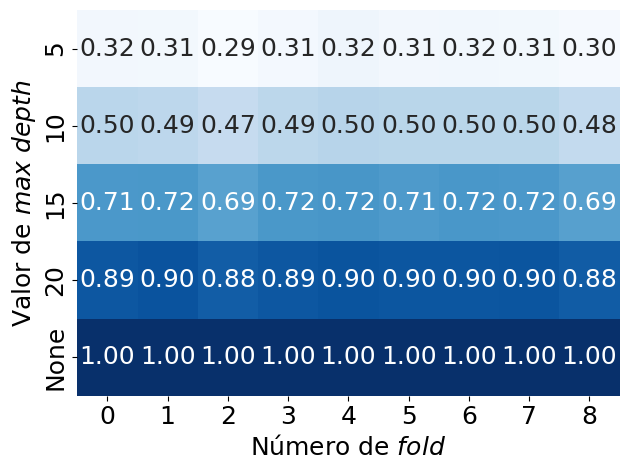

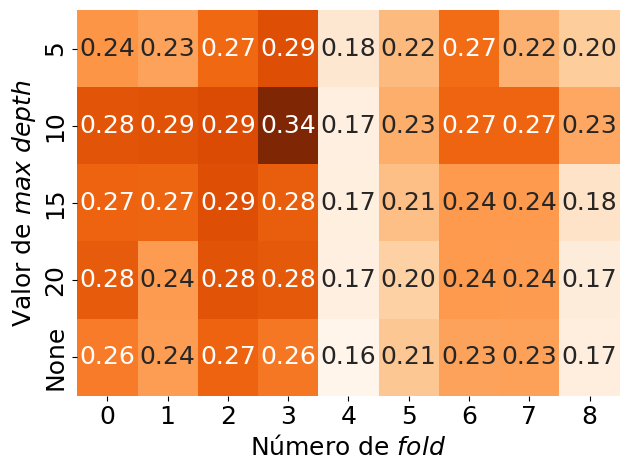

In [10]:
os.chdir(ruta_imag) # me situo en el directorio

# Crear matrices para train y val
train_matrix = np.array([vg[0] for vg in vectores_grafica])  # Métricas de train
val_matrix = np.array([vg[1] for vg in vectores_grafica])    # Métricas de validación

# Heatmap para train
plt.figure()

sns.heatmap(
    train_matrix,
    annot=True,
    cbar=False,
    fmt=".2f",
    cmap="Blues",
    xticklabels=range(train_matrix.shape[1]),
    yticklabels=['5', '10', '15', '20', 'None'],
    annot_kws={"fontsize": 18}
)

plt.xlabel("Número de $fold$", fontsize=18)
plt.ylabel("Valor de $max$ $depth$", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.savefig(metric_name + '_heatmap_train.pdf')
plt.show()

# Heatmap para val
plt.figure()

sns.heatmap(
    val_matrix,
    annot=True,
    cbar=False,
    fmt=".2f",
    cmap="Oranges",
    xticklabels=range(val_matrix.shape[1]),
    yticklabels=['5', '10', '15', '20', 'None'],
    annot_kws={"fontsize": 18}
)

plt.xlabel("Número de $fold$", fontsize=18)
plt.ylabel("Valor de $max$ $depth$", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.savefig(metric_name + '_heatmap_val.pdf')
plt.show()

Elijo qué columnas quiero visualizar del diccionario generado en el bloque anterior *resultados*

In [ ]:
# Tomo una estructura de datos del bloque anterior (estructuración de datos) y los visualizo
# está hecho para visualizar una metrica por fold
data = resultados.copy()

# esto me sirve para graficar métricas
# Voy a hacer el gráfico por folds
columns_to_visualize = ['split0_test_'+metric_name, 'split1_test_'+metric_name, 'split2_test_'+metric_name,
                 'split3_test_'+metric_name, 'split4_test_'+metric_name, 'split5_test_'+metric_name,
                 'split6_test_'+metric_name, 'split7_test_'+metric_name, 'split8_test_'+metric_name,
                 'split0_train_'+metric_name, 'split1_train_'+metric_name, 'split2_train_'+metric_name,
                 'split3_train_'+metric_name, 'split4_train_'+metric_name, 'split5_train_'+metric_name,
                 'split6_train_'+metric_name, 'split7_train_'+metric_name, 'split8_train_'+metric_name]
vectores_grafica = []
labels = []
for outer_key, inner_dict in data.items():
  labels.append(outer_key)
  test_values = []
  train_values = []
  for inner_key, inner_value in inner_dict.items():
    if (('test' in inner_key) and (inner_key in columns_to_visualize)):
      test_values.append(inner_value)
    elif (('train' in inner_key) and (inner_key in columns_to_visualize)):
      train_values.append(inner_value)
  vectores_grafica.append([train_values, test_values])



Guardo y visualizo la métrica elegida

['accuracy.pkl']

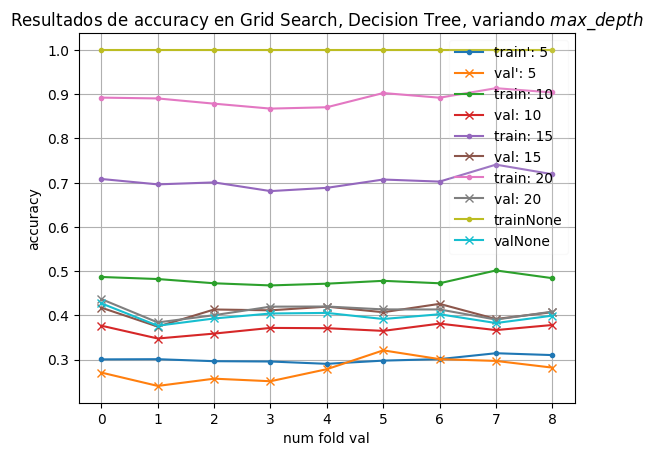

In [ ]:
plt.figure()
for i in range(len(vectores_grafica)):
  plt.plot(vectores_grafica[i][0], '.-', label = 'train'+labels[i][-5:-1])  # la 0 es la de train
  plt.plot(vectores_grafica[i][1], '-x', label = 'val'+labels[i][-5:-1])  # la 1 es la de val
plt.xlabel("num fold val")
plt.ylabel(metric_name)
plt.legend(fancybox=True, framealpha=0.1)
plt.title("Resultados de " + metric_name + " en Grid Search, Decision Tree, variando $max\_depth$")
plt.grid()
plt.savefig(metric_name + '.png')

joblib.dump(vectores_grafica, metric_name + '.pkl')

In [ ]:
# para atributos que no son métricas
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'mean_train_accuracy', 'std_train_accuracy',
    'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_train_precision', 'std_train_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_train_recall', 'std_train_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]

attributes_to_save = df_results.loc[:, columns_names]

attributes_to_save

,param_model__max_depth,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_train_precision,std_train_precision,mean_test_precision,std_test_precision,rank_test_precision,mean_train_recall,std_train_recall,mean_test_recall,std_test_recall,rank_test_recall
0,5,11.410129,0.618200,0.013912,0.002668,0.300596,0.006963,0.277362,0.024447,5,0.424419,0.038180,0.373326,0.048706,5,0.289794,0.006815,0.265015,0.025726,5
1,10,20.052513,0.833714,0.013381,0.002011,0.479493,0.009817,0.368347,0.009919,4,0.542183,0.016538,0.418048,0.019542,2,0.473863,0.009430,0.363453,0.010263,4
2,15,26.964872,0.495167,0.017730,0.008934,0.704707,0.016531,0.407422,0.014793,2,0.725787,0.016277,0.422049,0.017928,1,0.702154,0.016516,0.406071,0.014517,2
3,20,30.897553,0.578918,0.015913,0.003296,0.890043,0.014684,0.409432,0.015204,1,0.894815,0.012939,0.414775,0.016468,3,0.889032,0.014819,0.408760,0.014954,1
4,None,33.068069,0.674416,0.017765,0.007650,1.000000,0.000000,0.397876,0.013849,3,1.000000,0.000000,0.399010,0.013447,4,1.000000,0.000000,0.397916,0.013921,3


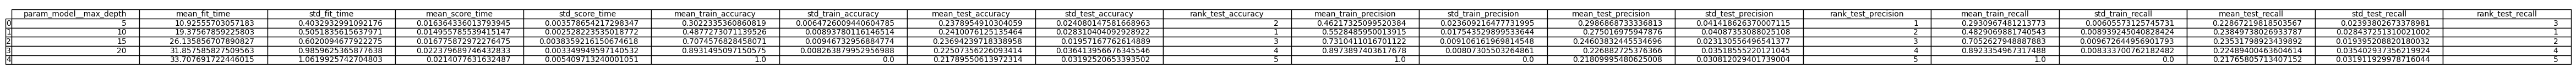

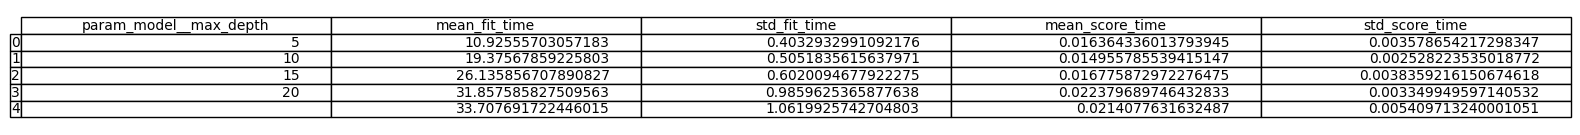

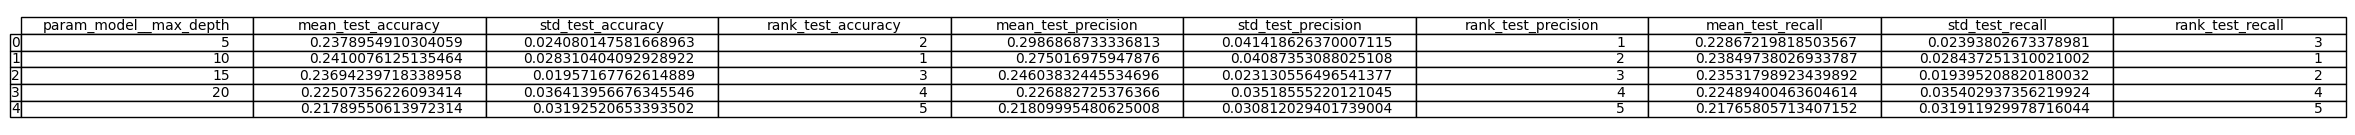

In [ ]:
# En el caso que el resultado sea un df, lo guardo como imagen
joblib.dump(attributes_to_save, "atributos_GridSearch.pkl")

# Guardo todos los atributos
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(60, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_GridSearch.png', bbox_inches='tight')

# Atributos de tiempo
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]

attributes_to_save = df_results.loc[:, columns_names]
attributes_to_save['mean_score_time_x_dato'] = attributes_to_save['mean_score_time'] / 6453

# Convertir los valores de la nueva columna a formato decimal como cadenas de texto
attributes_to_save['mean_score_time_x_dato'] = attributes_to_save['mean_score_time_x_dato'].map(lambda x: '{:.10f}'.format(x))
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(20, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_tiempo_GridSearch.png', bbox_inches='tight')

# Atributos rank, mean y std en val
columns_names = [
    'param_model__max_depth', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]

attributes_to_save = df_results.loc[:, columns_names]
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(30, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_rank_mean_std_GridSearch.png', bbox_inches='tight')

#### Tiempo de inferencia

,param_model__max_depth,MeanValue
0,5,0.001749
1,10,0.002125
2,15,0.001123
3,20,0.001685
4,None,0.001903


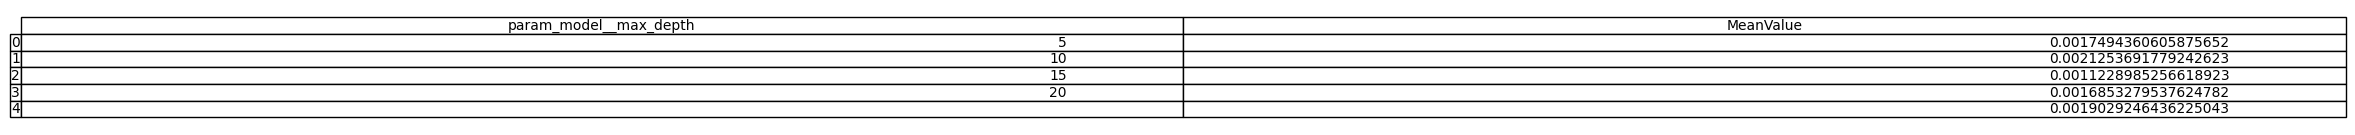

In [ ]:
# elijo los atributos de tiempo
metricas = ['mean_inference_time', 'std_inference_time', 'max_inference_time', 'min_inference_time']

time_attributes_names = [['param_model__max_depth']]

for i in range(len(metricas)):
  metric_name = metricas[i]
  columns_names = [
      'split0_test_'+metric_name, 'split1_test_'+metric_name, 'split2_test_'+metric_name,
      'split3_test_'+metric_name, 'split4_test_'+metric_name, 'split5_test_'+metric_name,
      'split6_test_'+metric_name, 'split7_test_'+metric_name, 'split8_test_'+metric_name
      # 'split0_train_'+metric_name, 'split1_train_'+metric_name, 'split2_train_'+metric_name,
      # 'split3_train_'+metric_name, 'split4_train_'+metric_name, 'split5_train_'+metric_name,
      # 'split6_train_'+metric_name, 'split7_train_'+metric_name, 'split8_train_'+metric_name
  ]
  time_attributes_names.append(columns_names)

time_attributes_names = np.concatenate(time_attributes_names).ravel()
# time_attributes_names
attributes_to_save = df_results.loc[:, time_attributes_names]

joblib.dump(attributes_to_save, "tiempo_inferencia_GridSearch.pkl")

time_max_attribute_name = [['param_model__max_depth']]
metric_name = "max_inference_time"
columns_names = [
    'split0_test_'+metric_name, 'split1_test_'+metric_name, 'split2_test_'+metric_name,
    'split3_test_'+metric_name, 'split4_test_'+metric_name, 'split5_test_'+metric_name,
    'split6_test_'+metric_name, 'split7_test_'+metric_name, 'split8_test_'+metric_name
]
time_max_attribute_name.append(columns_names)
time_max_attribute_name = np.concatenate(time_max_attribute_name).ravel()
df = df_results.loc[:, time_max_attribute_name]

# pd.DataFrame(attributes_to_save)
# Crear la segunda columna tomando el máximo por fila (sin considerar la primera columna)
df['MeanValue'] = df.iloc[:, 1:].mean(axis=1)

# Seleccionar solo la primera columna y la nueva columna 'MaxValue'
df = df[['param_model__max_depth', 'MeanValue']]

joblib.dump(df, "mean_tiempo_inferencia_GridSearch.pkl")
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(30, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, df, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('mean_tiempo_inferencia_GridSearch.png', bbox_inches='tight')
df

In [ ]:
attributes_to_save

,param_model__max_depth,split0_test_mean_inference_time,split1_test_mean_inference_time,split2_test_mean_inference_time,split3_test_mean_inference_time,split4_test_mean_inference_time,split5_test_mean_inference_time,split6_test_mean_inference_time,split7_test_mean_inference_time,split8_test_mean_inference_time,...,split8_test_max_inference_time,split0_test_min_inference_time,split1_test_min_inference_time,split2_test_min_inference_time,split3_test_min_inference_time,split4_test_min_inference_time,split5_test_min_inference_time,split6_test_min_inference_time,split7_test_min_inference_time,split8_test_min_inference_time
0,5,0.000133,0.000095,0.000089,0.000082,0.000119,0.000101,0.000084,0.000082,0.000084,...,0.004849,0.000071,0.000072,0.000071,0.000071,0.000073,0.000071,0.000071,0.000072,0.000072
1,10,0.000087,0.000090,0.000131,0.000118,0.000085,0.000083,0.000086,0.000119,0.000085,...,0.004217,0.000071,0.000071,0.000071,0.000072,0.000072,0.000071,0.000072,0.000071,0.000074
2,15,0.000137,0.000083,0.000081,0.000086,0.000081,0.000088,0.000124,0.000080,0.000084,...,0.000597,0.000071,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072
3,20,0.000087,0.000120,0.000080,0.000121,0.000088,0.000086,0.000081,0.000086,0.000117,...,0.000690,0.000073,0.000072,0.000072,0.000072,0.000072,0.000073,0.000072,0.000072,0.000072
4,None,0.000079,0.000081,0.000116,0.000087,0.000122,0.000083,0.000117,0.000086,0.000083,...,0.000632,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000075,0.000072,0.000072


### Resultados

#### Elección de hiperparámetros general

In [ ]:
hyperparams_sub = [10, 10, 10, 10, 10, 15, 10, 5, 10, 10]
hyperparams_rep = [15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

%cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS"

joblib.dump(hyperparams_sub, 'hyperparams_sub_dt.pkl')
joblib.dump(hyperparams_rep, 'hyperparams_rep_dt.pkl')

/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS


['hyperparams_rep_dt.pkl']

##### Sujeto 1 en test

Elección de hiperparámetros: **se elige max_depth=10.**

Según gráficos:
*   Por accuracy: max_depth=10
*   Por precision: max_depth=5 (con 10 empeora poco)
*   Por recall: max_depth=10 (con 5 empeora mucho)

Según atributos (rank, solo tiene en cuenta media):
*   Por accuracy: max_depth=10
*   Por precision: max_depth=5
*   Por recall: max_depth=10



Link: https://drive.google.com/drive/folders/10JD0Ob6X8bsWrkheqQ0N8JQWPqX6afLQ


###### Visualización de métricas

In [ ]:
# ejecutar el código de más arriba, eligiendo sujeto y métrica
# luego puedo ver de guardar los datos de una forma más práctica para visualizarlo desde acá

###### Visualización de atributos

In [ ]:
%cd "/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub1_test"
# levanto resultados
df_all_results = joblib.load("atributos_GridSearch.pkl")

# me quedo con los resultados de tiempo
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]
df_time_results =  df_results.loc[:, columns_names]

# me quedo con los resultados de rank, mean y std en val
columns_names = [
    'param_model__max_depth', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]
df_rank_results = df_results.loc[:, columns_names]

# escribo dataframe que quiera visualizar
df_rank_results

/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub1_test


,param_model__max_depth,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall
0,5,0.236309,0.033080,3,0.318807,0.057293,1,0.225246,0.036425,4
1,10,0.262957,0.046448,1,0.296284,0.061468,2,0.259939,0.047565,1
2,15,0.239337,0.041067,2,0.246951,0.040461,3,0.238442,0.039461,2
3,20,0.233222,0.042711,4,0.233411,0.042031,4,0.232933,0.040718,3
4,None,0.225870,0.038230,5,0.224389,0.039033,5,0.225061,0.036170,5


##### Sujeto 2 en test

Elección de hiperparámetros: **se elige max_depth=10.**

Según gráficos:
*   Por accuracy: max_depth=10
*   Por precision: max_depth=10
*   Por recall: max_depth=10

Según atributos (rank, solo tiene en cuenta media):
*   Por accuracy: max_depth=10
*   Por precision: max_depth=5
*   Por recall: max_depth=10



Link: https://drive.google.com/drive/folders/1RoX3zULSFsx4wTpAWPnKtu4SsMWK0ZqG

###### Visualización de métricas

In [ ]:
# ejecutar el código de más arriba, eligiendo sujeto y métrica
# luego puedo ver de guardar los datos de una forma más práctica para visualizarlo desde acá

###### Visualización de atributos

In [ ]:
%cd "/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub2_test"
# levanto resultados
df_all_results = joblib.load("atributos_GridSearch.pkl")

# me quedo con los resultados de tiempo
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]
df_time_results =  df_results.loc[:, columns_names]

# me quedo con los resultados de rank, mean y std en val
columns_names = [
    'param_model__max_depth', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]
df_rank_results = df_results.loc[:, columns_names]

# escribo dataframe que quiera visualizar
df_rank_results

/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub2_test


,param_model__max_depth,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall
0,5,0.244700,0.027277,2,0.288589,0.050551,1,0.231275,0.030512,3
1,10,0.249216,0.024370,1,0.274796,0.048590,2,0.244076,0.029689,1
2,15,0.234943,0.037799,3,0.236931,0.043848,3,0.232671,0.039715,2
3,20,0.222691,0.033087,4,0.221128,0.031838,4,0.221776,0.033101,4
4,None,0.216094,0.036440,5,0.212035,0.035735,5,0.215371,0.036463,5


##### Sujeto 3

Elección de hiperparámetros: **se elige max_depth=10.**

Según gráficos:
*   Por accuracy: max_depth=10 (buscaría entre 5 y 10)
*   Por precision: max_depth=5
*   Por recall: max_depth=10

Según atributos (rank, solo tiene en cuenta media):
*   Por accuracy: max_depth=10
*   Por precision: max_depth=5
*   Por recall: max_depth=10



Link: https://drive.google.com/drive/folders/1bCeZGG-E_7scJ90f5bykXf7prF640Eha

###### Visualización de métricas

In [ ]:
# ejecutar el código de más arriba, eligiendo sujeto y métrica
# luego puedo ver de guardar los datos de una forma más práctica para visualizarlo desde acá

###### Visualización de atributos

In [ ]:
%cd "/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub3_test"
# levanto resultados
df_all_results = joblib.load("atributos_GridSearch.pkl")

# me quedo con los resultados de tiempo
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]
df_time_results =  df_results.loc[:, columns_names]

# me quedo con los resultados de rank, mean y std en val
columns_names = [
    'param_model__max_depth', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]
df_rank_results = df_results.loc[:, columns_names]

# escribo dataframe que quiera visualizar
df_rank_results

/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub3_test


,param_model__max_depth,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall
0,5,0.245449,0.031624,1,0.350410,0.065889,1,0.236325,0.033618,1
1,10,0.236644,0.024702,2,0.264800,0.025345,2,0.234354,0.026672,2
2,15,0.226402,0.033334,3,0.232980,0.037926,3,0.226493,0.033567,3
3,20,0.217813,0.035063,4,0.217232,0.037306,4,0.218047,0.035730,4
4,None,0.216347,0.036256,5,0.214034,0.038334,5,0.216951,0.036676,5


##### Sujeto 4

Elección de hiperparámetros: **se elige max_depth=10.**

Según gráficos:
*   Por accuracy: max_depth=10
*   Por precision: max_depth=10
*   Por recall: max_depth=10

Según atributos (rank, solo tiene en cuenta media):
*   Por accuracy: max_depth=10
*   Por precision: max_depth=5
*   Por recall: max_depth=10



Link: https://drive.google.com/drive/folders/1rYL2QpwKxAdbDfXAi46SBxjTENbO8hGT

###### Visualización de métricas

In [ ]:
# ejecutar el código de más arriba, eligiendo sujeto y métrica
# luego puedo ver de guardar los datos de una forma más práctica para visualizarlo desde acá

###### Visualización de atributos

In [ ]:
%cd "/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub4_test"
# levanto resultados
df_all_results = joblib.load("atributos_GridSearch.pkl")

# me quedo con los resultados de tiempo
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]
df_time_results =  df_results.loc[:, columns_names]

# me quedo con los resultados de rank, mean y std en val
columns_names = [
    'param_model__max_depth', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]
df_rank_results = df_results.loc[:, columns_names]

# escribo dataframe que quiera visualizar
df_rank_results

/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub4_test


,param_model__max_depth,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall
0,5,0.220307,0.024236,3,0.289215,0.053487,1,0.210294,0.026010,5
1,10,0.238842,0.044784,1,0.273992,0.041822,2,0.237657,0.042663,1
2,15,0.226452,0.040540,2,0.238392,0.043532,3,0.226597,0.038090,2
3,20,0.215855,0.035914,4,0.215703,0.036273,4,0.215372,0.034319,3
4,None,0.215108,0.036401,5,0.212692,0.035083,5,0.214973,0.034806,4


##### Sujeto 5

Elección de hiperparámetros: **se elige max_depth=10.**

Según gráficos:
*   Por accuracy: max_depth=10 (buscaría entre 10 y 15)
*   Por precision: max_depth=5
*   Por recall: max_depth=10

Según atributos (rank, solo tiene en cuenta media):
*   Por accuracy: max_depth=10
*   Por precision: max_depth=10
*   Por recall: max_depth=10

Link: https://drive.google.com/drive/folders/1Vp4p60SYxLsGS4jcwhY4dme4eCpqHaKu

##### Visualización de métricas

In [ ]:
# ejecutar el código de más arriba, eligiendo sujeto y métrica
# luego puedo ver de guardar los datos de una forma más práctica para visualizarlo desde acá

###### Visualización de atributos

In [ ]:
%cd "/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub5_test"
# levanto resultados
df_all_results = joblib.load("atributos_GridSearch.pkl")

# me quedo con los resultados de tiempo
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]
df_time_results =  df_results.loc[:, columns_names]

# me quedo con los resultados de rank, mean y std en val
columns_names = [
    'param_model__max_depth', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]
df_rank_results = df_results.loc[:, columns_names]

# escribo dataframe que quiera visualizar
df_rank_results

/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub5_test


,param_model__max_depth,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall
0,5,0.225663,0.021428,3,0.292679,0.053233,2,0.216254,0.025709,4
1,10,0.251141,0.032113,1,0.293761,0.064944,1,0.247428,0.034298,1
2,15,0.233572,0.022489,2,0.243264,0.033549,3,0.232136,0.023307,2
3,20,0.217352,0.024769,4,0.217823,0.027809,4,0.216755,0.025135,3
4,None,0.213748,0.025448,5,0.213898,0.026987,5,0.213638,0.024815,5


##### Sujeto 6

Elección de hiperparámetros: **se elige max_depth=15.**

Según gráficos:
*   Por accuracy: max_depth=15
*   Por precision: max_depth=5
*   Por recall: max_depth=15

Según atributos (rank, solo tiene en cuenta media):
*   Por accuracy: max_depth=5
*   Por precision: max_depth=5
*   Por recall: max_depth=15

Link: https://drive.google.com/drive/folders/1gmgTYJ8OPjkHSvJzwZyZXKKY2laUbKto

###### Visualización de métricas

In [ ]:
# ejecutar el código de más arriba, eligiendo sujeto y métrica
# luego puedo ver de guardar los datos de una forma más práctica para visualizarlo desde acá

###### Visualización de atributos

In [ ]:
%cd "/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub6_test"
# levanto resultados
df_all_results = joblib.load("atributos_GridSearch.pkl")

# me quedo con los resultados de tiempo
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]
df_time_results =  df_results.loc[:, columns_names]

# me quedo con los resultados de rank, mean y std en val
columns_names = [
    'param_model__max_depth', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]
df_rank_results = df_results.loc[:, columns_names]

# escribo dataframe que quiera visualizar
df_rank_results

/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub6_test


,param_model__max_depth,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall
0,5,0.252933,0.036654,1,0.340620,0.051952,1,0.244096,0.037099,2
1,10,0.246011,0.029418,3,0.276896,0.039953,2,0.243572,0.027381,3
2,15,0.247826,0.030348,2,0.263657,0.040179,3,0.246723,0.029126,1
3,20,0.235386,0.023808,4,0.235519,0.023382,4,0.235481,0.023693,4
4,None,0.225590,0.027027,5,0.225235,0.026573,5,0.225281,0.026280,5


##### Sujeto 7

Elección de hiperparámetros: **se elige max_depth=10.**

Según gráficos:
*   Por accuracy: max_depth=10
*   Por precision: max_depth=5
*   Por recall: max_depth=10

Según atributos (rank, solo tiene en cuenta media):
*   Por accuracy: max_depth=5
*   Por precision: max_depth=5
*   Por recall: max_depth=10

Link: https://drive.google.com/drive/folders/1p80pP5fW3WPGoPxwndiUI5MT4apBcBDS

###### Visualización de métricas

In [ ]:
# ejecutar el código de más arriba, eligiendo sujeto y métrica
# luego puedo ver de guardar los datos de una forma más práctica para visualizarlo desde acá

###### Visualización de atributos

In [ ]:
%cd "/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub7_test"
# levanto resultados
df_all_results = joblib.load("atributos_GridSearch.pkl")

# me quedo con los resultados de tiempo
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]
df_time_results =  df_results.loc[:, columns_names]

# me quedo con los resultados de rank, mean y std en val
columns_names = [
    'param_model__max_depth', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]
df_rank_results = df_results.loc[:, columns_names]

# escribo dataframe que quiera visualizar
df_rank_results

/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub7_test


,param_model__max_depth,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall
0,5,0.237895,0.024080,2,0.298687,0.041419,1,0.228672,0.023938,3
1,10,0.241008,0.028310,1,0.275017,0.040874,2,0.238497,0.028437,1
2,15,0.236942,0.019572,3,0.246038,0.023131,3,0.235318,0.019395,2
3,20,0.225074,0.036414,4,0.226883,0.035186,4,0.224894,0.035403,4
4,None,0.217896,0.031925,5,0.218100,0.030812,5,0.217658,0.031912,5


##### Sujeto 8

Elección de hiperparámetros: **se elige max_depth=5.**

Según gráficos:
*   Por accuracy: max_depth=5
*   Por precision: max_depth=5
*   Por recall: max_depth=5

Según atributos (rank, solo tiene en cuenta media):
*   Por accuracy: max_depth=10
*   Por precision: max_depth=5
*   Por recall: max_depth=10

Link: https://drive.google.com/drive/folders/1X1Yl000ENhzLiTkFMNqq-x5Kenn68WfY

###### Visualización métricas

In [ ]:
# ejecutar el código de más arriba, eligiendo sujeto y métrica
# luego puedo ver de guardar los datos de una forma más práctica para visualizarlo desde acá

###### Visualización de atributos

In [ ]:
%cd "/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub8_test"
# levanto resultados
df_all_results = joblib.load("atributos_GridSearch.pkl")

# me quedo con los resultados de tiempo
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]
df_time_results =  df_results.loc[:, columns_names]

# me quedo con los resultados de rank, mean y std en val
columns_names = [
    'param_model__max_depth', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]
df_rank_results = df_results.loc[:, columns_names]

# escribo dataframe que quiera visualizar
df_rank_results

/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub8_test


,param_model__max_depth,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall
0,5,0.234693,0.013538,3,0.301612,0.045035,1,0.224799,0.018171,4
1,10,0.245299,0.040719,1,0.272169,0.053026,2,0.245895,0.038888,1
2,15,0.239095,0.028302,2,0.244968,0.036668,3,0.237817,0.028718,2
3,20,0.231879,0.027372,4,0.231348,0.027710,4,0.230904,0.027094,3
4,None,0.222916,0.026489,5,0.217645,0.026209,5,0.221900,0.026545,5


##### Sujeto 9

Elección de hiperparámetros: **se elige max_depth=10.**

Según gráficos:
*   Por accuracy: max_depth=10
*   Por precision: max_depth=5
*   Por recall: max_depth=10

Según atributos (rank, solo tiene en cuenta media):
*   Por accuracy: max_depth=10
*   Por precision: max_depth=5
*   Por recall: max_depth=10

Link: https://drive.google.com/drive/folders/14_Ni3Mb5A5zJ7w9dtP-id9H491MBp9Qa

###### Visualización de métricas

In [ ]:
# ejecutar el código de más arriba, eligiendo sujeto y métrica
# luego puedo ver de guardar los datos de una forma más práctica para visualizarlo desde acá

###### Visualización de atributos

In [ ]:
%cd "/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub9_test"
# levanto resultados
df_all_results = joblib.load("atributos_GridSearch.pkl")

# me quedo con los resultados de tiempo
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]
df_time_results =  df_results.loc[:, columns_names]

# me quedo con los resultados de rank, mean y std en val
columns_names = [
    'param_model__max_depth', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]
df_rank_results = df_results.loc[:, columns_names]

# escribo dataframe que quiera visualizar
df_rank_results

/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub9_test


,param_model__max_depth,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall
0,5,0.228545,0.038662,2,0.290868,0.064984,1,0.218009,0.037906,4
1,10,0.233854,0.040162,1,0.259232,0.051959,2,0.231881,0.040327,1
2,15,0.222410,0.040770,3,0.227004,0.039665,3,0.222985,0.039593,2
3,20,0.221346,0.035594,4,0.224652,0.036514,4,0.221688,0.035300,3
4,None,0.215590,0.035173,5,0.218675,0.036591,5,0.215211,0.034937,5


##### Sujeto 10

Elección de hiperparámetros: **se elige max_depth=10.**

Según gráficos:
*   Por accuracy: max_depth=10 (buscaría entre 5 y 10)
*   Por precision: max_depth=5
*   Por recall: max_depth=10

Según atributos (rank, solo tiene en cuenta media):
*   Por accuracy: max_depth=10
*   Por precision: max_depth=5
*   Por recall: max_depth=10

Link: https://drive.google.com/drive/folders/1EKuajQVE7JRq__2Ya5PCQ-0Jqsso5kw7

###### Visualización de métricas

In [ ]:
# ejecutar el código de más arriba, eligiendo sujeto y métrica
# luego puedo ver de guardar los datos de una forma más práctica para visualizarlo desde acá

###### Visualización de atributos

In [ ]:
%cd "/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub10_test"
# levanto resultados
df_all_results = joblib.load("atributos_GridSearch.pkl")

# me quedo con los resultados de tiempo
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]
df_time_results =  df_results.loc[:, columns_names]

# me quedo con los resultados de rank, mean y std en val
columns_names = [
    'param_model__max_depth', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]
df_rank_results = df_results.loc[:, columns_names]

# escribo dataframe que quiera visualizar
df_rank_results

/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_sujeto/sub10_test


,param_model__max_depth,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,rank_test_precision,mean_test_recall,std_test_recall,rank_test_recall
0,5,0.237895,0.024080,2,0.298687,0.041419,1,0.228672,0.023938,3
1,10,0.241008,0.028310,1,0.275017,0.040874,2,0.238497,0.028437,1
2,15,0.236942,0.019572,3,0.246038,0.023131,3,0.235318,0.019395,2
3,20,0.225074,0.036414,4,0.226883,0.035186,4,0.224894,0.035403,4
4,None,0.217896,0.031925,5,0.218100,0.030812,5,0.217658,0.031912,5


## Separación de datos por repetición
No voy a dejar escritos todos los resultados en el notebook, dejo el código en el que se pueden generar y visualizar todos los experimentos.

In [ ]:
# Levanto los datos de los resultados del Grid Search
%cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS"

pipelines_CV = joblib.load('gs_dt_PredefinedSplit_sep_rep.pkl')
particiones_CV = joblib.load('ps_dt_PredefinedSplit_sep_rep.pkl')

/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS


### Estructuro, visualizo y guardo los datos de interés
Objetivos:

*   Visualización.
*   Guardar métricas en Comet de forma más amigable.

In [ ]:
# elijo el numero de experimento. Tengo 10 experimentos, uno por sujeto o fold
i = 0 # PARAMETRO DE ENTRADA- de 0 a 9 inclusive

# MAS ABAJO TENGO QUE ELEGIR LA METRICA QUE QUIERO VISUALIZAR

# elijo el directorio donde quiero guardar los resultados del experimento actual
ruta_imag = "/content/drive/My Drive/tesis_Molina/resultados/HW/dt/x_rep/sub" + str(i+1) + "_test"
os.makedirs(ruta_imag, exist_ok=True) # me fijo si existe, si no, lo creo
os.chdir(ruta_imag) # me situo en el directorio

# miro los resultados del Grid Search para el sujeto elegido
grid_search = pipelines_CV[i]
# obtengo los resultados de Grid Search
cv_results = grid_search.cv_results_
# creo un DataFrame con los resultados
df_results = pd.DataFrame(cv_results)

# obtengo la lista de nombres de las columnas
column_names = df_results.columns.tolist()

print(column_names)
# df_results["params"]
# a= cv_results['mean_score_time']
# a
df_results['params']

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model__max_depth', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'split2_train_accuracy', 'split3_train_accuracy', 'split4_train_accuracy', 'split5_train_accuracy', 'split6_train_accuracy', 'split7_train_accuracy', 'split8_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'split5_test_precision', 'split6_test_precision', 'split7_test_precision', 'split8_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_train_precision', 'split1_train_precision

0       {'model__max_depth': 5}
1      {'model__max_depth': 10}
2      {'model__max_depth': 15}
3      {'model__max_depth': 20}
4    {'model__max_depth': None}
Name: params, dtype: object

Genero un diccionario en el que discrimino por valor de hiperparámetro y elijo guardar determinadas columnas.

También elijo qué métrica quiero visualizar.

In [ ]:
# defino la metrica a visualizar
# PARAMETRO DE ENTRADA
metric_name = 'accuracy'  # accuracy, precision o recall funciona bien

# para metricas me sirve esta definicion
columns_names = ['split0_test_'+metric_name, 'split1_test_'+metric_name, 'split2_test_'+metric_name,
                 'split3_test_'+metric_name, 'split4_test_'+metric_name, 'split5_test_'+metric_name,
                 'split6_test_'+metric_name, 'split7_test_'+metric_name, 'split8_test_'+metric_name,
                 'mean_test_'+metric_name, 'std_test_'+metric_name,
                 'split0_train_'+metric_name, 'split1_train_'+metric_name, 'split2_train_'+metric_name,
                 'split3_train_'+metric_name, 'split4_train_'+metric_name, 'split5_train_'+metric_name,
                 'split6_train_'+metric_name, 'split7_train_'+metric_name, 'split8_train_'+metric_name]

# esto es para metricas
# lo saco de df_results["params"]
# param_comb = [{'model__n_estimators': 5}, {'model__n_estimators': 50}, {'model__n_estimators': 75}, {'model__n_estimators': 100}, {'model__n_estimators': 500}]
param_comb = df_results.params.tolist()
def extract_grid_search_results(cv_results, column_names, param_comb):
    """
    Extrae resultados específicos de cv_results de GridSearchCV.

    Args:
    cv_results (dict): Diccionario de resultados de GridSearchCV.
    column_names (list): Lista de nombres de columnas que se desean extraer de cv_results.
    param_comb (list): Lista de combinaciones de hiperparámetros a incluir en los resultados.

    Returns:
    dict: Diccionario con los resultados extraídos.
    """
    resultados = {}

    # Filtrar combinaciones de hiperparámetros
    for i in range(len(cv_results['params'])):
        current_params = cv_results['params'][i]
        if current_params in param_comb:
            metrics = {}
            for column in column_names:
                metrics[column] = cv_results[column][i]
            resultados[str(current_params)] = metrics

    return resultados

resultados = extract_grid_search_results(grid_search.cv_results_, columns_names, param_comb)
pd.DataFrame(resultados)

,{'model__max_depth': 5},{'model__max_depth': 10},{'model__max_depth': 15},{'model__max_depth': 20},{'model__max_depth': None}
split0_test_accuracy,0.270411,0.376435,0.417178,0.436527,0.426931
split1_test_accuracy,0.240268,0.347476,0.374392,0.383820,0.376369
split2_test_accuracy,0.256657,0.358595,0.413109,0.400189,0.392784
split3_test_accuracy,0.250861,0.371438,0.411212,0.419511,0.404009
split4_test_accuracy,0.278092,0.370790,0.419523,0.419821,0.405365
split5_test_accuracy,0.320664,0.364722,0.406919,0.413280,0.391561
split6_test_accuracy,0.300851,0.381129,0.425831,0.413148,0.402320
split7_test_accuracy,0.296799,0.366504,0.391579,0.390317,0.382432
split8_test_accuracy,0.281656,0.378036,0.407057,0.408279,0.399114
mean_test_accuracy,0.277362,0.368347,0.407422,0.409432,0.397876


Elijo qué columnas quiero visualizar del diccionario generado en el bloque anterior *resultados*

In [ ]:
# Tomo una estructura de datos del bloque anterior (estructuración de datos) y los visualizo
# está hecho para visualizar una metrica por fold
data = resultados.copy()

# esto me sirve para graficar métricas
# Voy a hacer el gráfico por folds
columns_to_visualize = ['split0_test_'+metric_name, 'split1_test_'+metric_name, 'split2_test_'+metric_name,
                 'split3_test_'+metric_name, 'split4_test_'+metric_name, 'split5_test_'+metric_name,
                 'split6_test_'+metric_name, 'split7_test_'+metric_name, 'split8_test_'+metric_name,
                 'split0_train_'+metric_name, 'split1_train_'+metric_name, 'split2_train_'+metric_name,
                 'split3_train_'+metric_name, 'split4_train_'+metric_name, 'split5_train_'+metric_name,
                 'split6_train_'+metric_name, 'split7_train_'+metric_name, 'split8_train_'+metric_name]
vectores_grafica = []
labels = []
for outer_key, inner_dict in data.items():
  labels.append(outer_key)
  test_values = []
  train_values = []
  for inner_key, inner_value in inner_dict.items():
    if (('test' in inner_key) and (inner_key in columns_to_visualize)):
      test_values.append(inner_value)
    elif (('train' in inner_key) and (inner_key in columns_to_visualize)):
      train_values.append(inner_value)
  vectores_grafica.append([train_values, test_values])

Guardo y visualizo la métrica elegida

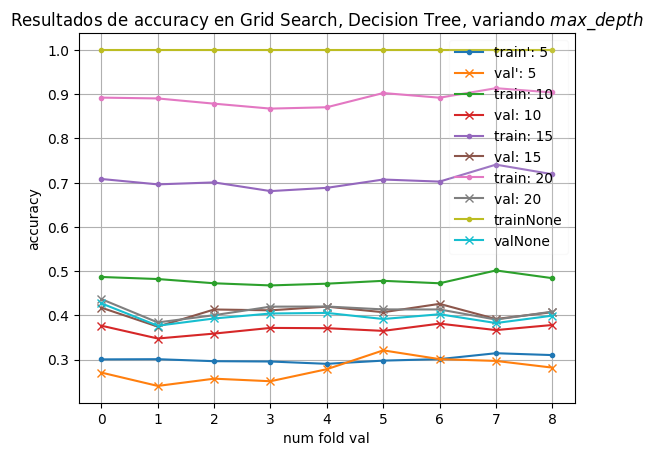

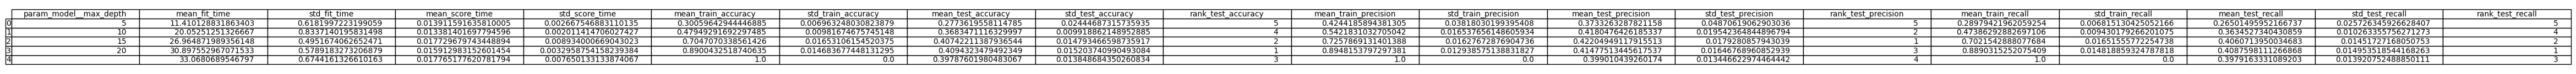

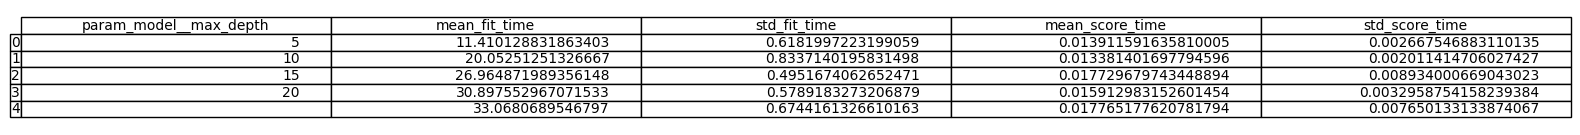

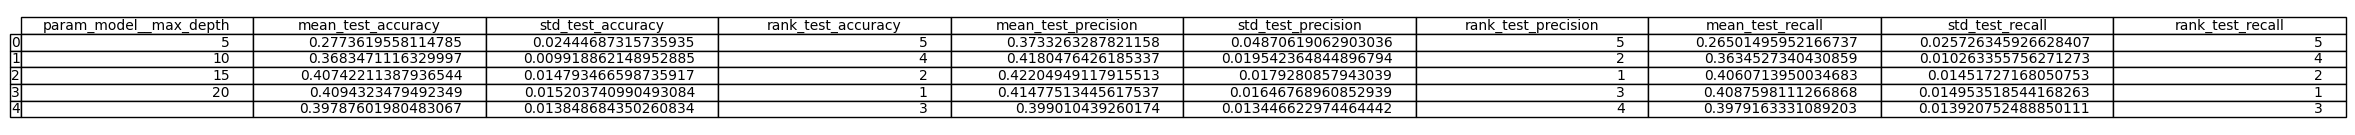

In [ ]:
# TODO que se fije automaticamente el nombre del hiperparametro y nombre de algoritmo
plt.figure()
for i in range(len(vectores_grafica)):
  plt.plot(vectores_grafica[i][0], '.-', label = 'train'+labels[i][-5:-1])  # la 0 es la de train
  plt.plot(vectores_grafica[i][1], '-x', label = 'val'+labels[i][-5:-1])  # la 1 es la de val
plt.xlabel("num fold val")
plt.ylabel(metric_name)
plt.legend(fancybox=True, framealpha=0.1)
plt.title("Resultados de " + metric_name + " en Grid Search, Decision Tree, variando $max\_depth$")
plt.grid()
plt.savefig(metric_name + '.png')

joblib.dump(vectores_grafica, metric_name + '.pkl')

#-------------------------------------- GUARDO OTRAS METRICAS EN FORMA DE TABLA-------------------------
# para atributos que no son métricas
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'mean_train_accuracy', 'std_train_accuracy',
    'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_train_precision', 'std_train_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_train_recall', 'std_train_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]

attributes_to_save = df_results.loc[:, columns_names]

# En el caso que el resultado sea un df, lo guardo como imagen
joblib.dump(attributes_to_save, "atributos_GridSearch.pkl")

# Guardo todos los atributos
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(60, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_GridSearch.png', bbox_inches='tight')

# Atributos de tiempo
columns_names = [
    'param_model__max_depth', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'
]

attributes_to_save = df_results.loc[:, columns_names]
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(20, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_tiempo_GridSearch.png', bbox_inches='tight')

# Atributos rank, mean y std en val
columns_names = [
    'param_model__max_depth', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'std_test_precision', 'rank_test_precision',
    'mean_test_recall', 'std_test_recall', 'rank_test_recall'
]

attributes_to_save = df_results.loc[:, columns_names]
# Crear una figura y un eje sin marcos
fig, ax = plt.subplots(figsize=(30, 1.5))
ax.axis('off')  # Ocultar ejes

# Crear la tabla y agregarla al eje
table(ax, attributes_to_save, loc='center')

# Guardar la figura como una imagen PNG
plt.savefig('atributos_rank_mean_std_GridSearch.png', bbox_inches='tight')

### Elección de hiperparámetros

#### Separando datos por sujeto

In [ ]:
hyperparams_sub = [10, 10, 10, 10, 10, 15, 10, 5, 10, 10]

#### Separando datos por repetición

In [ ]:
hyperparams_rep = [10, 10, 10, 10, 10, 15, 10, 5, 10, 10]

In [ ]:
%cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS"

joblib.dump(hyperparams_sub, 'hyperparams_sub_dt.pkl')
joblib.dump(hyperparams_rep, 'hyperparams_rep_dt.pkl')

/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/hello_world/resultados_preliminares/con_PS


['hyperparams_rep_dt.pkl']

# Backup